In [142]:
import os
import jieba
import jieba.analyse
import sys
import matplotlib.pyplot as plt
import numpy as np

if not os.path.exists('hw1-dataset.txt'):
    !wget https://raw.githubusercontent.com/cjwu/cjwu.github.io/master/courses/nlp/hw1-dataset.txt
if not os.path.exists('dict.txt.big'):
    !wget https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big

In [71]:
stopwords=[]
for word in open('stopwords.txt','r', encoding='utf-8'):
    stopwords.append(word.strip())

In [2]:
filename = "hw1-dataset.txt" 
myfile = open(filename,'rb') 
lines = len(myfile.readlines()) 
print(lines) #確認行數

418202


In [64]:
content = []
for i in open(filename,'r', encoding='utf-8'): 
    content.append(jieba.lcut(i))

In [93]:
print(content[0]) #印一下第0行確認無誤

['為', '什麼', ' ', '聖結石', ' ', '會', '被', '酸', '而', ' ', '這群', '人', ' ', '不會', '？', '\t', '質感', ' ', '劇本', ' ', '成員', ' ', '都', '差', '很多', '好', '嗎', ' ', '不要', '拿', '腎', '結石來', '污辱', '這群', '人', '\n']


In [110]:
wordcount = {}
counter = 0
for i in range(lines):
    for word in content[i]:
        if len(word) > 1:
            if word not in stopwords:
                wordcount[word] = wordcount.get(word, 0)+1
                counter += 1
index = sorted(wordcount.items(), key=lambda x: x[1], reverse=True)[:100] #依照出現頻率高低進行排序並儲存

In [112]:
print(index) #確認結果

[('八卦', 79119), ('台灣', 35851), ('可以', 23236), ('肥宅', 21771), ('真的', 16890), ('知道', 14114), ('自己', 13560), ('不是', 11943), ('現在', 11279), ('就是', 11021), ('如果', 10690), ('還是', 10589), ('一個', 10535), ('中國', 10230), ('一堆', 10098), ('這樣', 9671), ('有人', 9666), ('怎樣', 8861), ('時候', 8806), ('女生', 8630), ('日本', 8594), ('一樣', 8514), ('到底', 8471), ('不要', 8245), ('大家', 7886), ('很多', 7488), ('應該', 7003), ('喜歡', 6782), ('因為', 6652), ('看到', 6323), ('朋友', 6303), ('問題', 6177), ('感覺', 6147), ('哪個', 6126), ('如何', 6007), ('這麼', 5924), ('多少', 5830), ('一直', 5686), ('覺得', 5527), ('這種', 5414), ('美國', 5358), ('不能', 5267), ('不用', 5230), ('根本', 4952), ('一定', 4863), ('正妹', 4833), ('其實', 4623), ('只有', 4487), ('為何', 4464), ('還有', 4373), ('東西', 4368), ('比較', 4308), ('台北', 4288), ('那麼', 4264), ('可能', 4249), ('以前', 4139), ('QQ', 3990), ('時間', 3965), ('一下', 3937), ('開始', 3919), ('這個', 3850), ('妹妹', 3812), ('哪裡', 3806), ('世界', 3792), ('今天', 3775), ('沒人', 3725), ('甚麼', 3700), ('出來', 3656), ('所以', 3633), ('那個', 3577), ('直接

In [115]:
print(index[0][1]) #檢查一下[0][1]是否為欲取用的值

79119


In [149]:
xpt = np.arange(0,100,1)
ypt = np.zeros(100)
for i in range(100):
    ypt[i] = index[i][1]

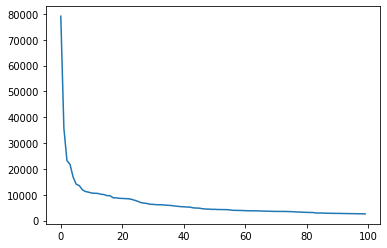

In [150]:
plt.plot(xpt,ypt)
plt.show()

以上為出現頻率圖，X軸為字詞編號，Y軸為出現頻率(由高到低)